In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 150
plt.style.use('ggplot')

In [43]:
dados = pd.read_csv('questao1.txt',sep='\t')

In [44]:
corrente_diodo = dados['I(D1)']
tensao_diodo = dados['v1']

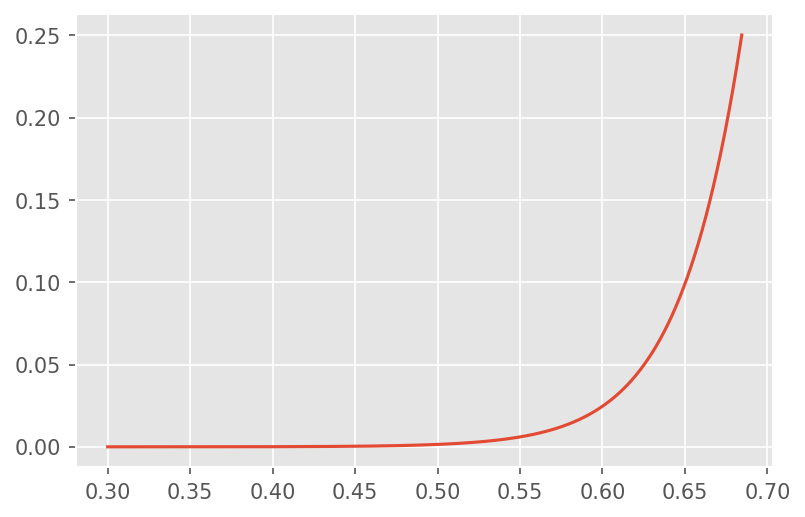

In [45]:
plt.plot(tensao_diodo,corrente_diodo)

In [46]:
#Fatiar o vetores de forma a pegar apenas o ultimo oitavo com a função array_split.
#Detalhe: Em python os índices dos vetores começam em zero. Por isso, o índice 7 foi escolhido para pegar o ultimo oitavo.
tensao_diodo_oitavo = np.array_split(tensao_diodo,8)[7]
corrente_diodo_oitavo = np.array_split(corrente_diodo,8)[7]


In [47]:
#Linearizando a característica no último oitavo.
b, a = np.polynomial.polynomial.polyfit(tensao_diodo_oitavo,corrente_diodo_oitavo,1)
rd = 1/a
Vd0 = -b/a
corrente_diodo_linear = tensao_diodo_oitavo/rd - Vd0/rd;


In [48]:
print(f"Para o modelo linearizado, temos que rd:{rd:.3f} Ohm e Vd0:{Vd0:.3f} V.")

Para o modelo linearizado, temos que rd:0.270 Ohm e Vd0:0.622 V.


In [49]:
#Ajuste da caracteristica exponencial
corrente_diodo_ln = np.log(corrente_diodo)
d, c = np.polynomial.polynomial.polyfit(tensao_diodo,corrente_diodo_ln,1)
eta = 1/(0.026*c)
Is = np.exp(d)

In [50]:
corrente_diodo_exp = Is*np.exp(tensao_diodo/(0.026*eta))

In [51]:
print(f"Para o modelo exponencial, temos que eta:{eta:.3f} V e Is:{Is*10**9:.3f} nV.")


Para o modelo exponencial, temos que eta:1.364 V e Is:1.102 nV.


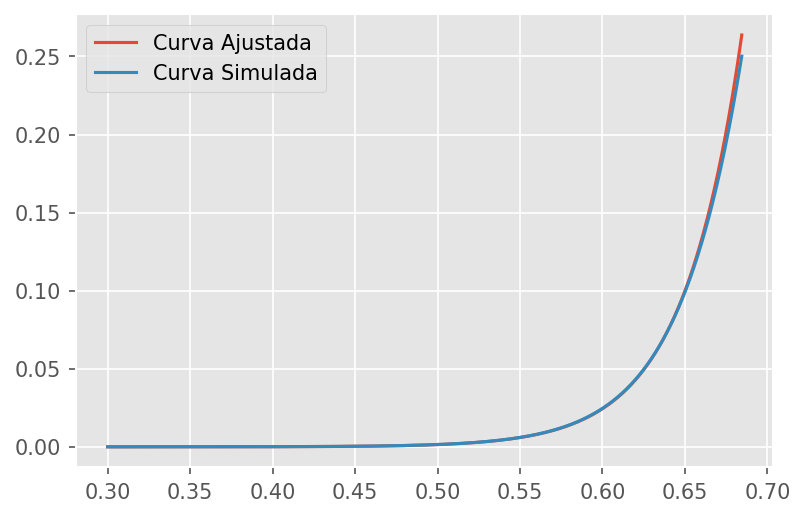

In [52]:
plt.figure(1)
plt.plot(tensao_diodo,corrente_diodo_exp,label='Curva Ajustada')
plt.plot(tensao_diodo,corrente_diodo,label='Curva Simulada')
plt.legend()
#plt.savefig('output1.png')

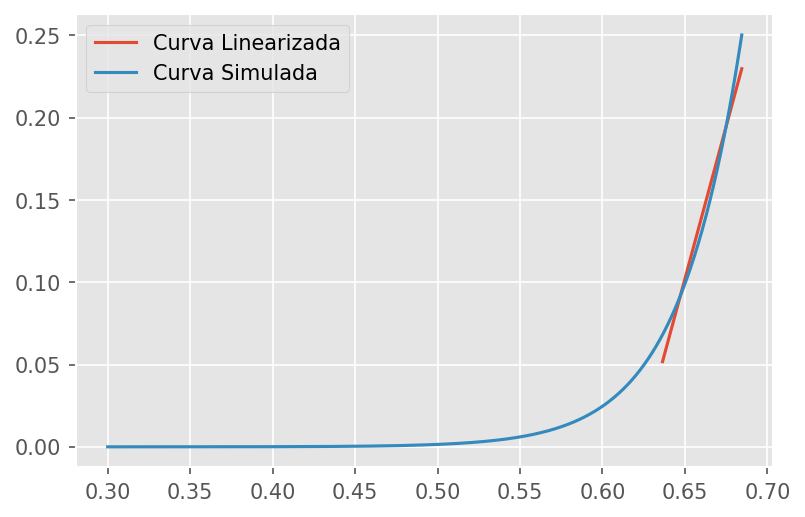

In [53]:
plt.figure(2)
plt.plot(tensao_diodo_oitavo,corrente_diodo_linear,label='Curva Linearizada')
plt.plot(tensao_diodo,corrente_diodo,label='Curva Simulada')
plt.legend()
#plt.savefig('output2.png')

In [54]:
d1,c1 = np.polynomial.polynomial.polyfit([0,1],[3,5],1)


In [55]:
print(f"Reta da forma {c}x + {d}")
print(f"Reta da forma {a}x + {b}")

Reta da forma 28.18767261266894x + -20.6257837270474
Reta da forma 3.7046998391264574x + -2.305957432644108


#### Para fins de comparação vou analisar os valores do código fornecido na aula

In [56]:
tensao_diodo_ex  = pd.read_csv('vdt.txt',sep='\t')['v']
corrente_diodo_ex = pd.read_csv('idt.txt',sep='\t')['i']

In [57]:
b_ex, a_ex = np.polynomial.polynomial.polyfit(tensao_diodo_ex,corrente_diodo_ex,1)
rd_ex = 1/a_ex
Vd0_ex = -b_ex/a_ex
#Corresponde aos valores esperados

In [58]:
print(f"Para o modelo linearizado temos que rd:{rd_ex:.3f} Ohm e Vd0:{Vd0_ex:.3f} V.")

Para o modelo linearizado temos que rd:1.275 Ohm e Vd0:0.726 V.


In [59]:
#Ajuste da caracteristica exponencial
corrente_diodo_ln_ex = np.log(corrente_diodo_ex)
d_ex, c_ex = np.polynomial.polynomial.polyfit(tensao_diodo_ex,corrente_diodo_ln_ex,1)
eta_ex = 1/(0.026*c_ex)
Is_ex = np.exp(d_ex)
corrente_diodo_exp_ex = Is_ex*np.exp(tensao_diodo_ex/(0.026*eta_ex))

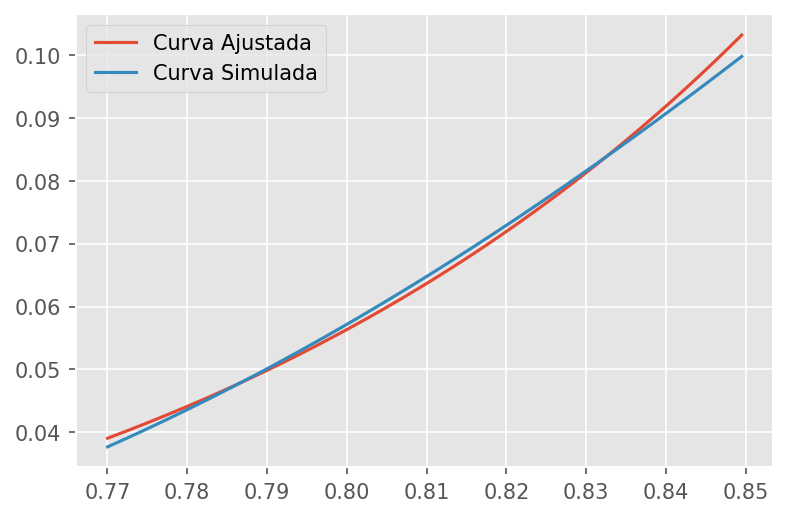

In [60]:
plt.figure(3)
plt.plot(tensao_diodo_ex,corrente_diodo_exp_ex,label='Curva Ajustada')
plt.plot(tensao_diodo_ex,corrente_diodo_ex,label='Curva Simulada')
plt.legend()
plt.savefig('output3.png',dpi=200)

## Conta da questão 3 (c)

In [61]:
vd = eta*0.026*np.log(0.25/Is)

In [62]:
vd

0.6825497667118613

In [68]:
np.where(corrente_diodo_exp >= 0.25)

(array([38255, 38256, 38257, 38258, 38259, 38260, 38261, 38262, 38263,
        38264, 38265, 38266, 38267, 38268, 38269, 38270, 38271, 38272,
        38273, 38274, 38275, 38276, 38277, 38278, 38279, 38280, 38281,
        38282, 38283, 38284, 38285, 38286, 38287, 38288, 38289, 38290,
        38291, 38292, 38293, 38294, 38295, 38296, 38297, 38298, 38299,
        38300, 38301, 38302, 38303, 38304, 38305, 38306, 38307, 38308,
        38309, 38310, 38311, 38312, 38313, 38314, 38315, 38316, 38317,
        38318, 38319, 38320, 38321, 38322, 38323, 38324, 38325, 38326,
        38327, 38328, 38329, 38330, 38331, 38332, 38333, 38334, 38335,
        38336, 38337, 38338, 38339, 38340, 38341, 38342, 38343, 38344,
        38345, 38346, 38347, 38348, 38349, 38350, 38351, 38352, 38353,
        38354, 38355, 38356, 38357, 38358, 38359, 38360, 38361, 38362,
        38363, 38364, 38365, 38366, 38367, 38368, 38369, 38370, 38371,
        38372, 38373, 38374, 38375, 38376, 38377, 38378, 38379, 38380,
      

In [70]:
tensao_diodo[38255]

0.6825499999993692